In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blank value in totalcharges with 0.

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0)
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

0

In [11]:
df["customerID"].duplicated().sum()

0

# Create function to convert 0 and 1 value of SeniorCitizen into "yes" and "no" value

In [13]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. What percentage of customers have churned?
→ Countplot and pie chart showing overall churn rate (~26.5%).

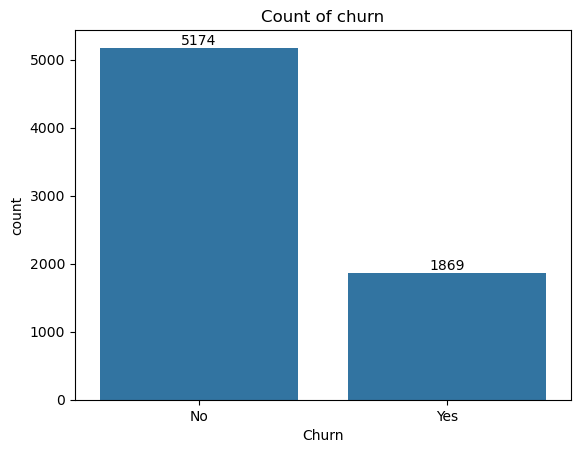

In [16]:
ax=sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of churn")
plt.show()

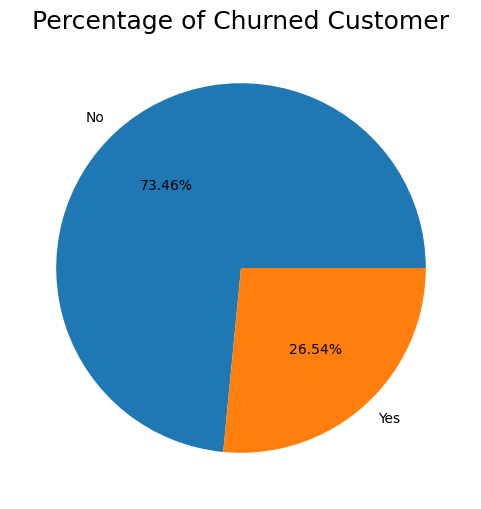

In [17]:
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.figure(figsize=(7,6))
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customer", fontsize=18)
plt.show()

- ### From the given chart we can conclude that 26.54% of our customer have churned out.
- ### Reson for this is below

# 2. Does gender have an effect on churn?
→ Countplot by gender vs churn — no major difference observed.

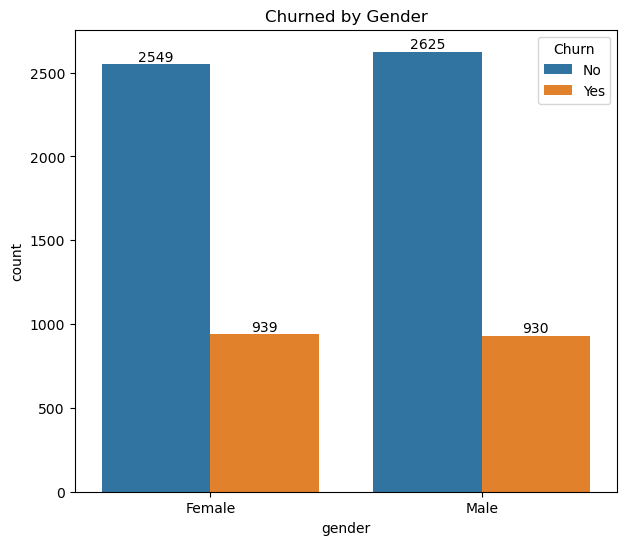

In [20]:
plt.figure(figsize=(7, 6))
ax = sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churned by Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

# 3. Are senior citizens more likely to churn?
→ Senior citizens show a higher proportion of churn.

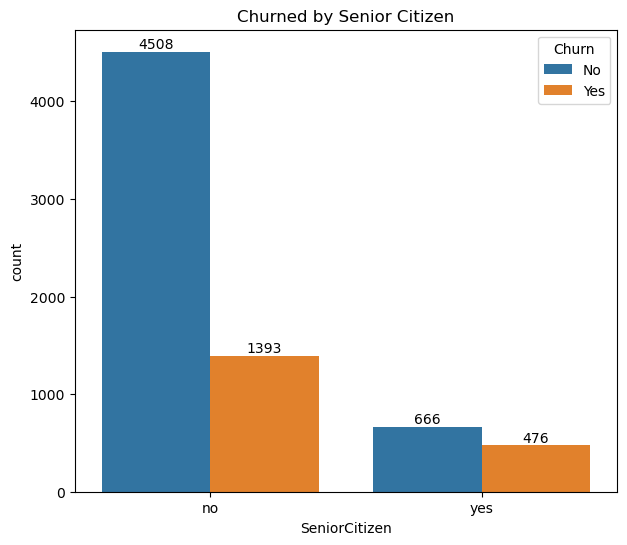

In [22]:
plt.figure(figsize=(7,6))
ax=sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
    
plt.title("Churned by Senior Citizen")
plt.show()

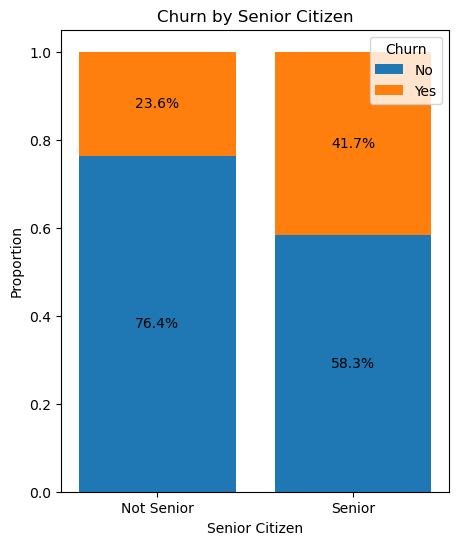

In [23]:
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
data_percent = data.div(data.sum(axis=1), axis=0)

plt.figure(figsize=(5,6))
bottom = [0] * len(data_percent)

for churn_value in data_percent.columns:
    values = data_percent[churn_value]
    bars = plt.bar(data_percent.index,
                   values,
                   bottom=bottom,
                   label=churn_value)

    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0.01:  
            plt.text(bar.get_x() + bar.get_width() / 2,
                     bottom[i] + height / 2,
                     f'{height * 100:.1f}%',
                     ha='center', va='center', fontsize=10)
        bottom[i] += height

plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Proportion")
plt.legend(title="Churn")
plt.xticks([0, 1], labels=["Not Senior", "Senior"])
plt.ylim(0, 1.05)
plt.show()

- ### Comparative a greated percentage of people in senior citizen category have churned

# 4. How does customer tenure affect churn likelihood?
→ Customers in the 0–12 month tenure group have the highest churn rate.

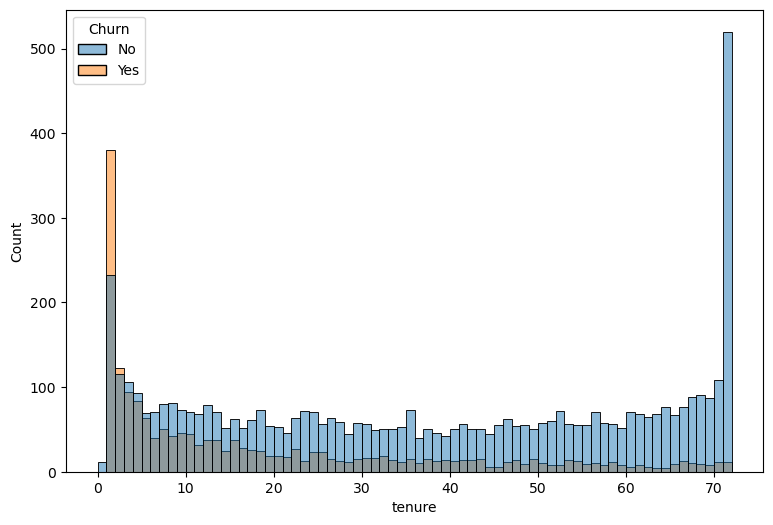

In [26]:
plt.figure(figsize=(9,6))
sns.histplot(x="tenure", data=df, bins=72, hue='Churn')
plt.show()

- ### People who haved used our services for a long time have stayed and people who have our service 1 or 2 months have churned

# 5. Which contract types are most associated with churn?
→ Month-to-month contracts have the highest churn rate.

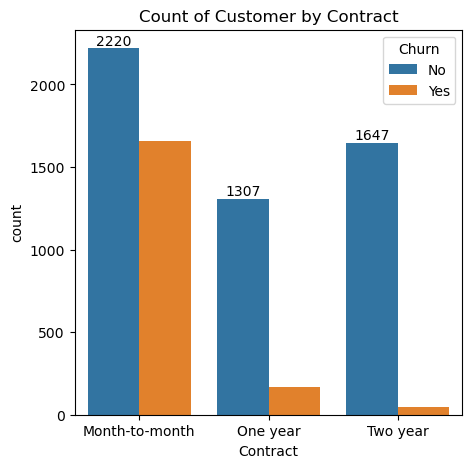

In [29]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

- ### People who have month to moth contract like to churn then  who have one yer contact or two year contarct

In [31]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# 6. Does use of internet and additional services affect churn?
→ Churn is higher for customers who do not use services like online security, backup, tech support.

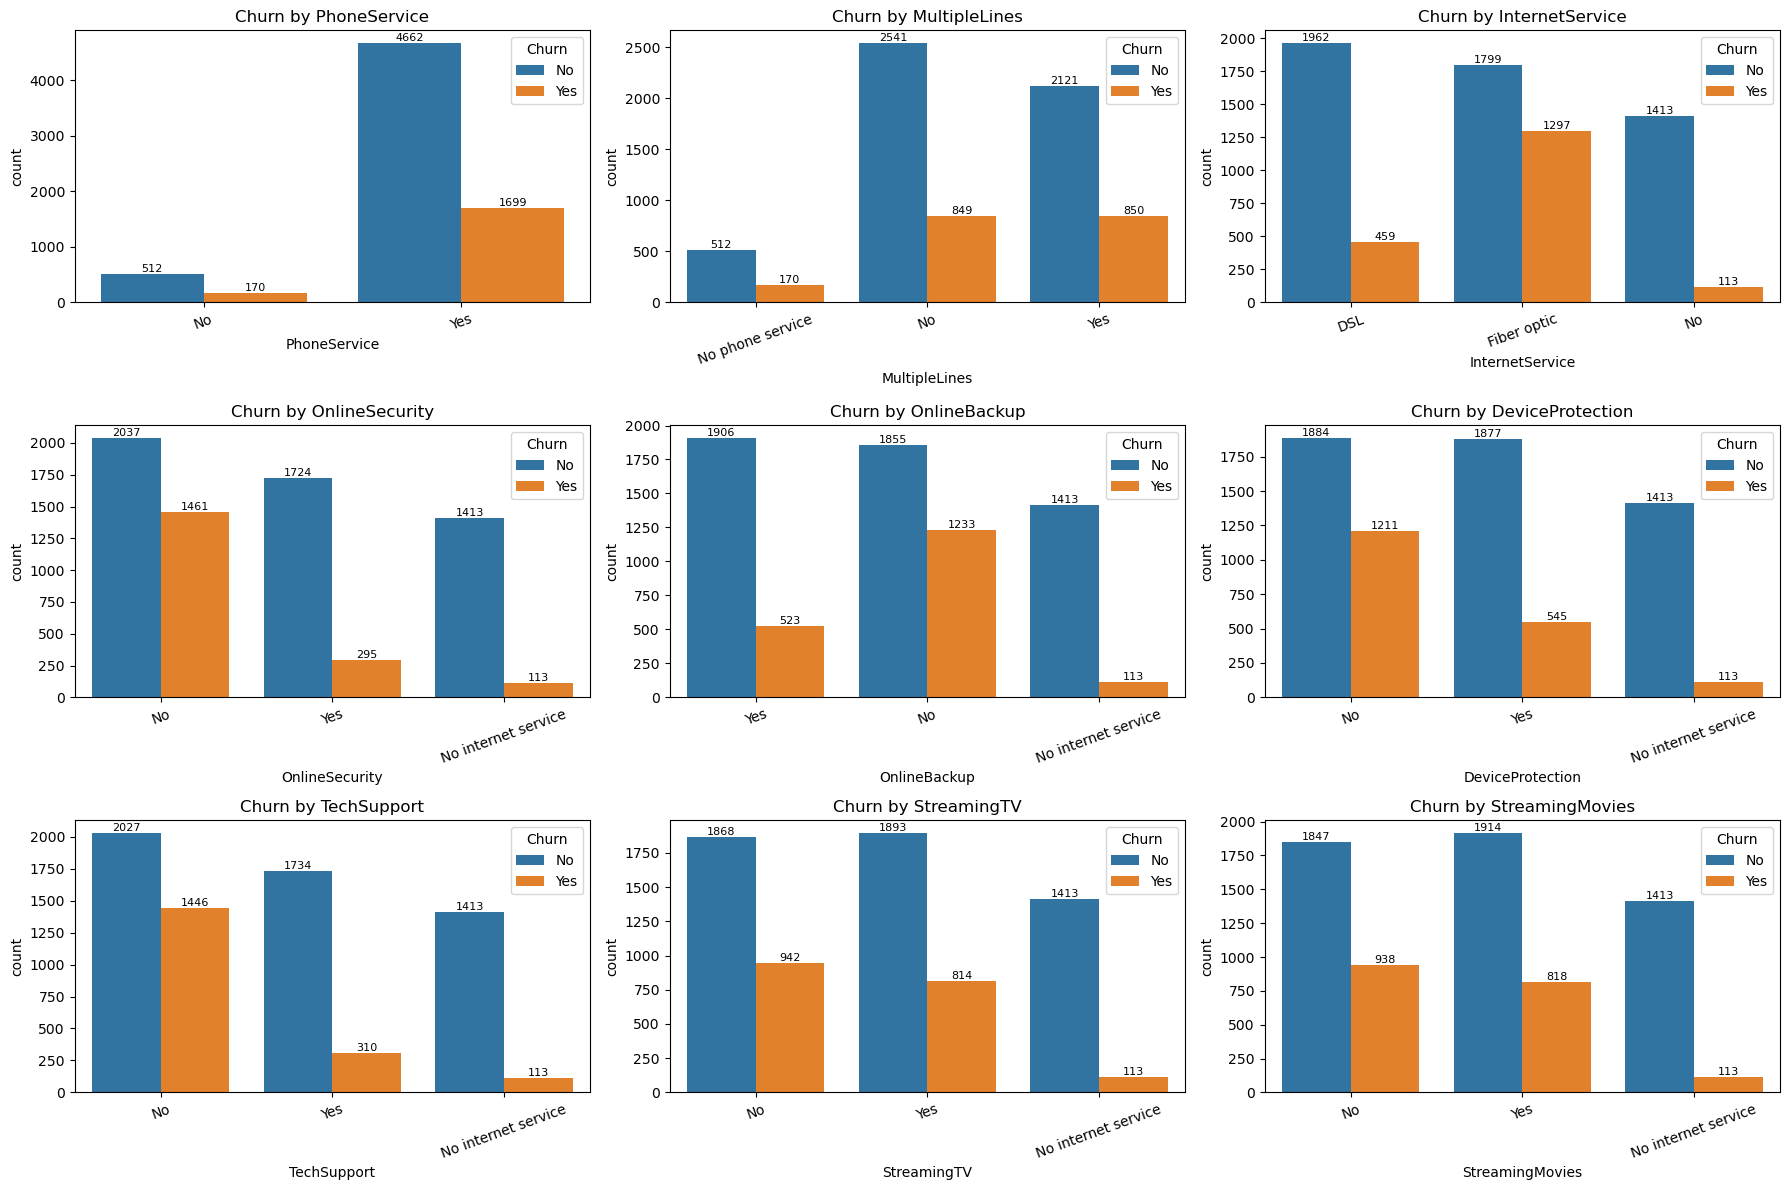

In [33]:

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten() 

for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue="Churn", ax=ax)
    ax.set_title(f"Churn by {col}")
    ax.tick_params(axis='x', rotation=20)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()


- ### Customers who don’t have internet service rarely leave, but those who do have internet are more likely to leave if they don’t use extra services like online security or tech support. People who use these extra services tend to stay longer. For phone services, churn is higher among those who have the service, especially if they don’t use multiple lines. Overall, not using available services seems linked to a higher chance of leaving.

# 7. Do payment methods impact churn?
→ Customers using Electronic Check are most likely to churn.

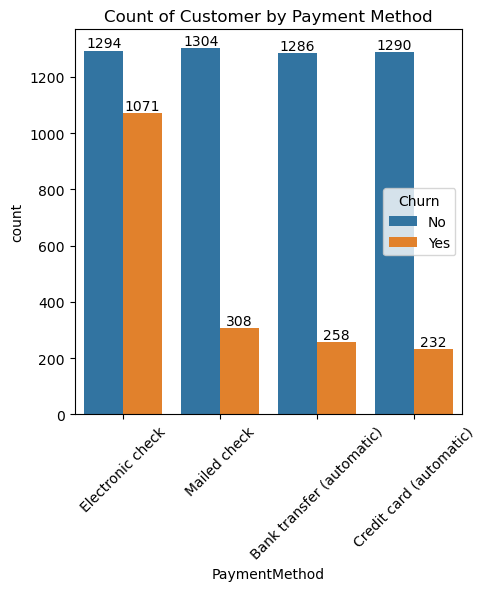

In [36]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Count of Customer by Payment Method")
plt.xticks(rotation=45)
plt.show()

- ### customer likely to churn when using electronic check 

# 8. What is the relationship between tenure, monthly charges, and total charges?
→ Heatmap shows strong correlation between tenure and total charges.

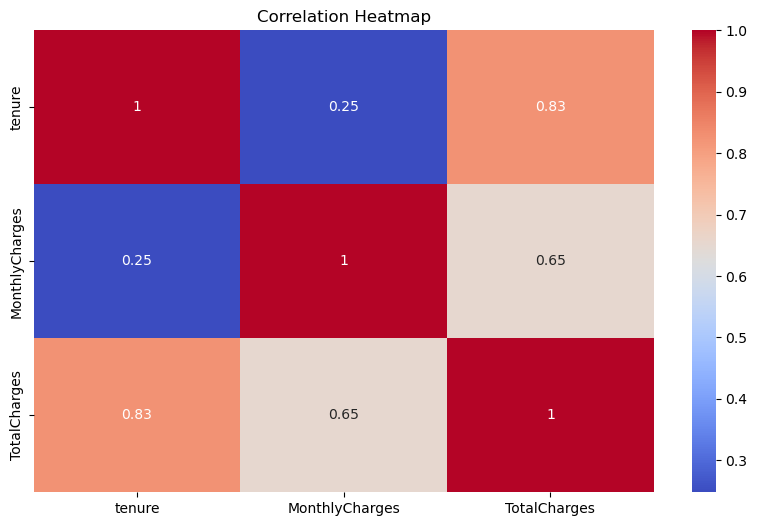

In [39]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


- ### The heatmap shows that TotalCharges is strongly correlated with tenure (0.83) and moderately with MonthlyCharges (0.65), while tenure and MonthlyCharges have a weak correlation (0.25)

# 9. How does customer tenure group impact churn rate?
→ It analyzes churn across different tenure bins (e.g., 0–12, 13–24, etc.), showing that churn is highest among new customers and decreases significantly with longer tenure.

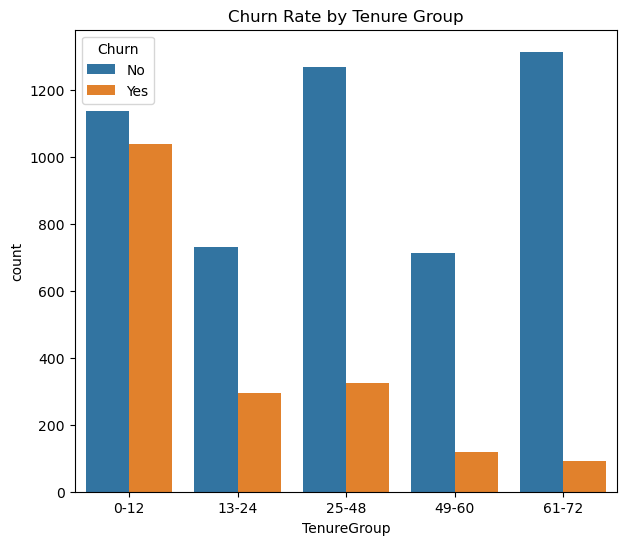

In [42]:
# Bin tenure
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                           labels=["0-12", "13-24", "25-48", "49-60", "61-72"])

# Plot churn by tenure group
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='TenureGroup', hue='Churn')
plt.title("Churn Rate by Tenure Group")
plt.show()


- ### The chart shows that customers with shorter tenures (0–12 months) are much more likely to churn, while those with longer tenures, especially 25 months and beyond, are significantly less likely to leave.

# 10. Do monthly or total charges differ for churned customers?
→ Churned customers pay higher monthly charges but have lower total charges.

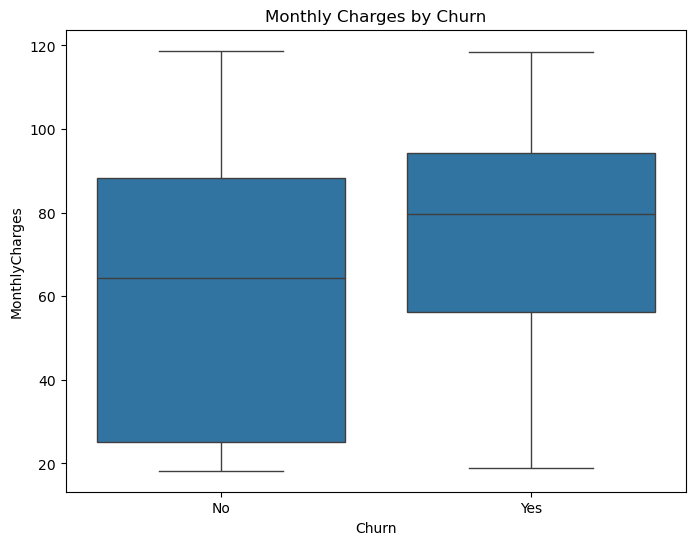

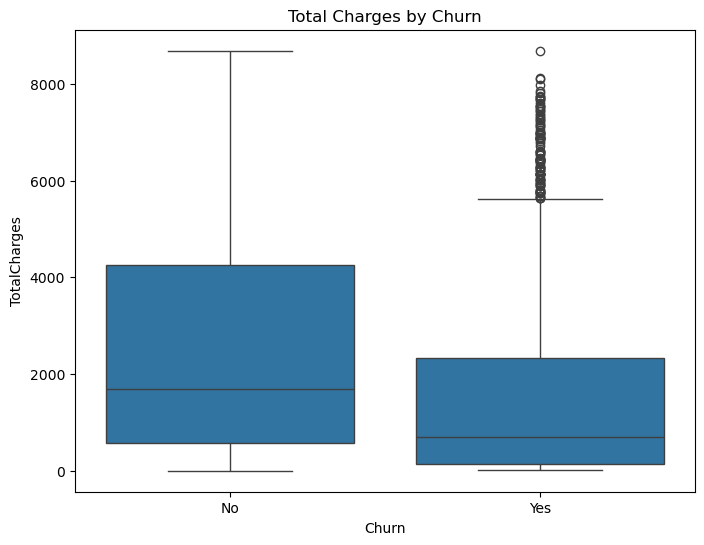

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges by Churn")
plt.show()


- ### The boxplots show that churned customers tend to have higher monthly charges but lower total charges, indicating they leave early despite paying more per month.

# 11. Where are churned customers positioned in numeric feature space?
→ Pairplot shows churned customers cluster at low tenure and total charges.

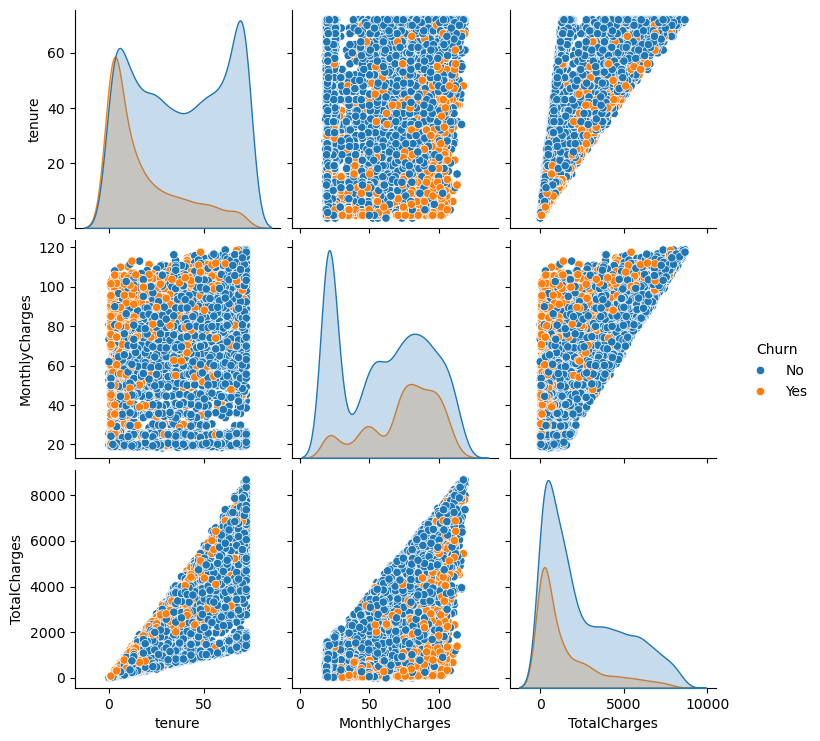

In [48]:
selected_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[selected_cols + ['Churn']], hue='Churn')
plt.show()


- ### The pairplot reveals that churned customers cluster at lower tenure and lower total charges, while non-churned customers are spread across higher tenures and charges, suggesting retention improves with longer engagement.

# 12. How well can churn be predicted with a Random Forest model?
→ Model achieves 80% accuracy, but lower performance on churned customers (f1-score: 0.55) due to class imbalance.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df_ml = df.drop(columns=['customerID'])

if 'TenureGroup' in df_ml.columns:
    df_ml = df_ml.drop(columns=['TenureGroup'])

label_enc = LabelEncoder()
for column in df_ml.columns:
    if df_ml[column].dtype == 'object':
        df_ml[column] = label_enc.fit_transform(df_ml[column])

X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



- ### The classification report shows that the Random Forest model performs well overall (80% accuracy), but struggles to predict churned customers (f1-score: 0.55), indicating class imbalance or the need for better feature engineering.